In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For data preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering  # For clustering
import matplotlib.pyplot as plt  # For plotting
import scipy.cluster.hierarchy as sch  # For hierarchical clustering

# Load the dataset
data = pd.read_csv('Live.csv')

In [2]:
# Drop columns with all missing values
data.dropna(axis=1, how='all', inplace=True)

# Drop columns with unique values to every instance
unique_cols = [col for col in data.columns if data[col].nunique() == len(data)]
data.drop(columns=unique_cols, inplace=True)

# Convert 'status_published' to Unix timestamp
data['status_published'] = pd.to_datetime(data['status_published'])  # Convert to datetime object
data['status_published'] = data['status_published'].astype(int) / 10**9  # Convert to Unix timestamp


In [3]:
# Handle categorical features
cat_features = ['status_type']
for feature in cat_features:
    label_encoder = LabelEncoder()  # Initialize LabelEncoder
    data[feature] = label_encoder.fit_transform(data[feature])  # Encode categorical feature

# Feature scaling
scaler = StandardScaler()  # Initialize StandardScaler
scaled_data = scaler.fit_transform(data)  # Scale the data

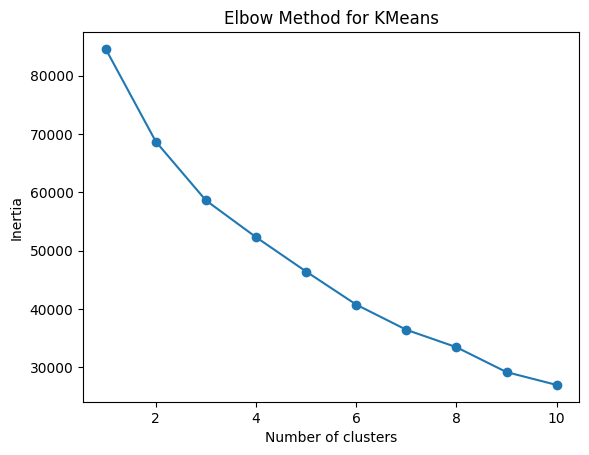

In [4]:
# Identify the optimal number of clusters using Elbow Method for KMeans
inertia = []  # List to store inertia values
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Initialize KMeans with given number of clusters
    kmeans.fit(scaled_data)  # Fit KMeans to the scaled data
    inertia.append(kmeans.inertia_)  # Append inertia value to the list

# Plot the Elbow Method graph to identify optimal number of clusters for KMeans
plt.plot(range(1, 11), inertia, marker='o')  # Plot inertia values against number of clusters
plt.xlabel('Number of clusters')  # Set x-axis label
plt.ylabel('Inertia')  # Set y-axis label
plt.title('Elbow Method for KMeans')  # Set title
plt.show()  # Show the plot

In [5]:
# From the elbow method for KMeans, choose the optimal number of clusters
optimal_n_clusters_kmeans = 3  # You need to choose based on the elbow point

# Perform KMeans clustering
kmeans = KMeans(n_clusters=optimal_n_clusters_kmeans, random_state=42)  # Initialize KMeans with optimal number of clusters
kmeans.fit(scaled_data)  # Fit KMeans to the scaled data

# Add KMeans cluster labels to the dataset
data['kmeans_cluster'] = kmeans.labels_  # Add KMeans cluster labels as a new column

# Group the data by KMeans cluster and find majority status_type
kmeans_cluster_majority_status = data.groupby('kmeans_cluster')['status_type'].agg(lambda x: x.mode().iloc[0])  # Find majority status_type for each KMeans cluster

# Print the majority status_type for each KMeans cluster
print("Majority status_type for each KMeans cluster:")
for cluster_num, majority_status_type in kmeans_cluster_majority_status.items():
    print(f"KMeans Cluster {cluster_num}: Majority status_type = {majority_status_type}")

Majority status_type for each KMeans cluster:
KMeans Cluster 0: Majority status_type = 1
KMeans Cluster 1: Majority status_type = 3
KMeans Cluster 2: Majority status_type = 1


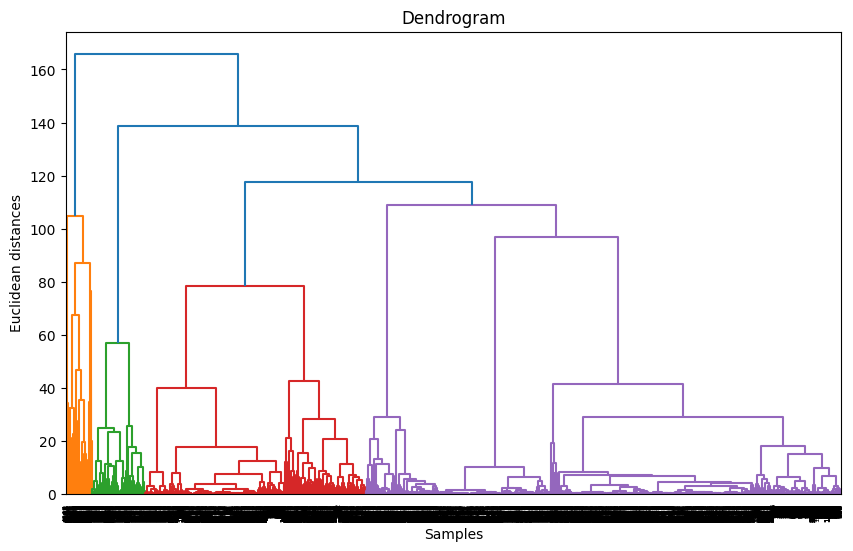

In [6]:
# Hierarchical clustering
# Determine optimal number of clusters using dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [7]:
# From the dendrogram, determine the optimal number of clusters
optimal_n_clusters_hierarchical = 3  # You need to choose based on the dendrogram

# Perform hierarchical clustering
hc = AgglomerativeClustering(n_clusters=optimal_n_clusters_hierarchical, linkage='ward')
hierarchical_clusters = hc.fit_predict(scaled_data)

# Add hierarchical cluster labels to the dataset
data['hierarchical_cluster'] = hierarchical_clusters  # Add hierarchical cluster labels as a new column

# Group the data by hierarchical cluster and find majority status_type
hierarchical_cluster_majority_status = data.groupby('hierarchical_cluster')['status_type'].agg(lambda x: x.mode().iloc[0])  # Find majority status_type for each hierarchical cluster

# Print the majority status_type for each hierarchical cluster
print("\nMajority status_type for each hierarchical cluster:")
for cluster_num, majority_status_type in hierarchical_cluster_majority_status.items():
    print(f"Hierarchical Cluster {cluster_num}: Majority status_type = {majority_status_type}")



Majority status_type for each hierarchical cluster:
Hierarchical Cluster 0: Majority status_type = 1
Hierarchical Cluster 1: Majority status_type = 3
Hierarchical Cluster 2: Majority status_type = 1
